In [1]:
# sentence bert or SBERT, this is a natural language processing (NLP) to create sentence embedding(s).

In [2]:
# install
!pip install sentence-transformers

In [3]:
# import
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

c:\Users\vanvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# load in news data
news_data2 = pd.read_csv('sentiment_news_data.csv')

In [5]:
test = True

# list to store all entries
all_entries = []

# loop and add entry/entries to the list
#for col in [f'Top{i}' for i in range(1, 26)]:
for i in range(1, 26):
    # get top 1 to 25
    col  = f'Top{i}'
    col2 = f'Sen_Top{i}'
    col_data = news_data2[col]
    col_data2 = news_data2[col2]
    #for item in col_data:
    for j in range(len(col_data)):
        #all_entries.append([item]) 
        #all_entries.append([item, col_data2])
        all_entries.append([col_data[j], col_data2[j]])


if test:
    print(len(all_entries))
    print(all_entries[0][0])
    print(all_entries[0][1])
    print(all_entries[1][0])
    print(all_entries[1][1])

46475
north korea open sky south korean medium report
0.0
got fear trump threatens declassify fbi justice department file surveillance abuse clinton email probe doj slow release congress
-0.3


In [6]:
# may need to enable developer mode

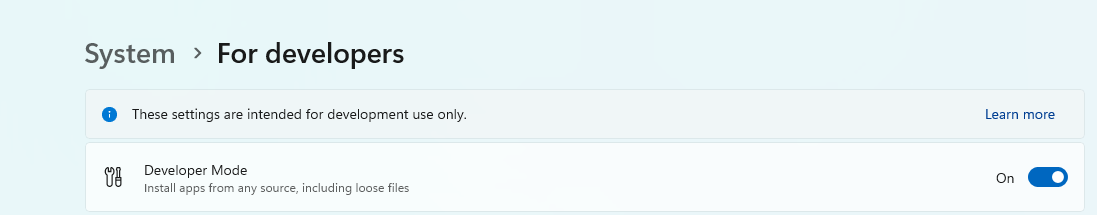

In [12]:
# setup model

# this model can be used for semantic searches
model = SentenceTransformer('all-MiniLM-L6-v2')
all_entries2 = [str(entry[0]) for entry in all_entries]
all_embed = model.encode(all_entries2)

In [13]:
# save file

np.save('all_embed.npy', all_embed)

In [15]:
# sentence for test
one = "China Bought Russia"

# encode new test sentence
one_embed = model.encode(one)

# use cosine
cos_score = util.cos_sim(one_embed, all_embed)

# fix from 2D to 1D and remove NaN items
cos_score = np.nan_to_num(cos_score)
cos_score = cos_score.flatten()

# setup range
ran = 10

# return search range
search_idx = np.argsort(cos_score)[::-1][:ran]

for i, idx in enumerate(search_idx):
    print("i                 : " + str(i))
    print("idx               : " + str(idx))
    print("all_entries2[idx] : " + str(all_entries2[idx]))
    print("cos_score[idx]    : " + str(cos_score[idx]))
    print("\n")


i                 : 0
idx               : 5713
all_entries2[idx] : russia china trust
cos_score[idx]    : 0.7684453


i                 : 1
idx               : 9071
all_entries2[idx] : china russia forging new world order
cos_score[idx]    : 0.69577396


i                 : 2
idx               : 43374
all_entries2[idx] : china bought russia s400 missile taiwan need sam
cos_score[idx]    : 0.64861387


i                 : 3
idx               : 5212
all_entries2[idx] : serbia showcase artillery bought russia china
cos_score[idx]    : 0.6355673


i                 : 4
idx               : 22211
all_entries2[idx] : u see chinese company helping russia ukraine effortsource
cos_score[idx]    : 0.63167065


i                 : 5
idx               : 33444
all_entries2[idx] : russia could become china economic colony cia director say
cos_score[idx]    : 0.6267494


i                 : 6
idx               : 12946
all_entries2[idx] : china reportedly negotiating russia supply kamikaze drone
cos_sc

In [16]:
# function sent_bert
# input(s)
#  - main   : array with multiple strings
#  - query  : array with 1 string
#  - res    : int
# return(s)
#  - array (size of res) (from highest to lowest score)

# compute sentence bert score among the data samples
def sent_bert(main, query, res, file = None):
    # this model can be used for semantic searches
    model = SentenceTransformer('all-MiniLM-L6-v2')

    if file == None:
        all_entries2 = [entry[0] for entry in main]
        all_embed = model.encode(all_entries2)
    else:
        all_embed = np.load(file)
        all_entries2 = [entry[0] for entry in main]

    # encode new test sentence
    one_embed = model.encode(query)

    # use cosine
    cos_score = util.cos_sim(one_embed, all_embed)

    # fix from 2D to 1D and remove NaN items
    cos_score = np.nan_to_num(cos_score)
    cos_score = cos_score.flatten()

    # return search range
    search_idx = np.argsort(cos_score)[::-1][:res]

    ret_val = []

    for i, idx in enumerate(search_idx):
        ret_val.append([idx, all_entries2[idx], cos_score[idx] ])

    return ret_val


In [35]:
ran = 10

bert_ret = sent_bert(all_entries, ["whales are bad"], ran, 'all_embed.npy')
print(bert_ret)

for i in range(ran):
    print(bert_ret[i][0])
    print(bert_ret[i][1])
    print("\n")

[[np.int64(18148), 'meat really bad', np.float32(0.56592155)], [np.int64(43202), 'beachgoers come together help stranded whale', np.float32(0.5421478)], [np.int64(35410), 'whale spotted pushing dead calf day', np.float32(0.5356828)], [np.int64(5788), '145 whale wash new zealand beach', np.float32(0.52347684)], [np.int64(31765), 'baby whale freed shark net gold coast', np.float32(0.52034795)], [np.int64(14961), 'environment grieving orca mother carry dead calf day whale fight survival', np.float32(0.5184667)], [np.int64(4780), 'group 28 pilot whale successfully refloated notorious new zealand beach dozen marine mammal died week longfinned pilot whale restranded appeared finally swum sea', np.float32(0.51637363)], [np.int64(9328), 'pilot whale died southern thailand swallowing 80 plastic bag thai marine official say whale vomited five bag vain attempt conservation official save canal songkhla province', np.float32(0.5092102)], [np.int64(1279), 'whale advocate least 575 whale killed 2021 

In [33]:
ran = 10

bert_ret = sent_bert(all_entries, ["Whales are good"], ran, 'all_embed.npy')
print(bert_ret)

for i in range(ran):
    print(bert_ret[i][0])
    print(bert_ret[i][1])
    print("\n")

[[np.int64(43202), 'beachgoers come together help stranded whale', np.float32(0.5798886)], [np.int64(35410), 'whale spotted pushing dead calf day', np.float32(0.5264813)], [np.int64(8422), 'researcher think spotted new whale specie mexico', np.float32(0.5228523)], [np.int64(5788), '145 whale wash new zealand beach', np.float32(0.52247626)], [np.int64(4780), 'group 28 pilot whale successfully refloated notorious new zealand beach dozen marine mammal died week longfinned pilot whale restranded appeared finally swum sea', np.float32(0.5170711)], [np.int64(31765), 'baby whale freed shark net gold coast', np.float32(0.5148232)], [np.int64(43157), 'new subspecies pilot whale discovered 250yearold theory proved correct', np.float32(0.5032114)], [np.int64(14961), 'environment grieving orca mother carry dead calf day whale fight survival', np.float32(0.49764165)], [np.int64(26701), 'military sonar disturbs blue whale feeding research reveals highintensity military sonar major impact feeding hab